In [1]:
#load the data:

import pandas as pd

train_data = pd.read_csv('cs-training.csv')

print(train_data.head())

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

In [2]:
#explore the data

print(train_data.describe())



          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            


Note:

count: This is the count of non-missing (non-null) values for each column. It tells us how many data points are available for analysis.

mean: The mean (average) value of each column. It gives us an idea of the central tendency of the data.

std: The standard deviation, which measures the dispersion or spread of the data. A larger standard deviation indicates greater variability in the data.

min: The minimum value in each column.

25% (percentile): The value below which 25% of the data falls. This is also known as the first quartile.

50% (percentile): The median value, which is the value that separates the data into two equal halves. This is also known as the second quartile.

75% (percentile): The value below which 75% of the data falls. This is also known as the third quartile.

max: The maximum value in each column.

Here is an example to see how such information help our analyses using the age column:

count: There are 150,000 data points available for analysis.
mean: The average age of individuals is approximately 52.30 years.
std: The age varies by about 14.77 years on average.
min: The minimum age in the dataset is 0 (which seems to be an anomaly).
25%: 25% of the individuals are below the age of 41.
50%: The median age is 52, meaning 50% of individuals are below this age.
75%: 75% of individuals are below the age of 63.
max: The oldest individual in the dataset is 109 years old.

We can apply similar interpretations to the other columns as well. Pay special attention to anomalies, like the minimum age of 0 and the large values in some columns (e.g., RevolvingUtilizationOfUnsecuredLines, NumberOfTimes90DaysLate). Cleaning and handling such anomalies is crucial for accurate modeling.

Also, we can see that some columns have a count less than the total number of rows, indicating missing values. We'll need to address these missing values during the data cleaning step.

Understanding the statistics helps us identify patterns and potential issues in the data, which is essential for accurate analysis and modeling.

In [7]:
#Data Cleaning:
#Handle missing values and anomalies in the data. 
#For example, you might replace missing MonthlyIncome values with the median of the column.

train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].mean())
train_data['NumberOfDependents'] = train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].mean())

train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


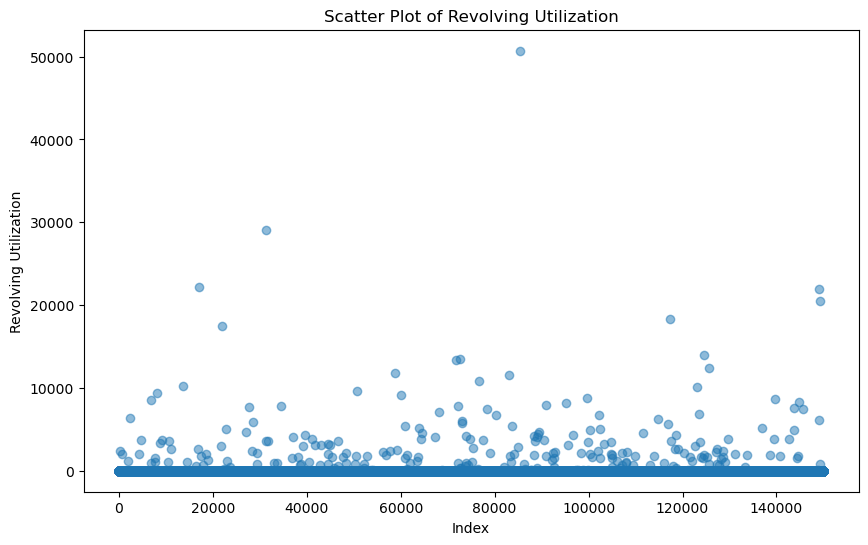

In [8]:
#visualize the data to see how many outliers exist

import matplotlib.pyplot as plt
import seaborn as sns


# Scatter Plot of RevolvingUtilizationOfUnsecuredLines bcuz the std is high here as an indicator
plt.figure(figsize=(10, 6))
plt.scatter(train_data.index, train_data['RevolvingUtilizationOfUnsecuredLines'], alpha=0.5)
plt.title('Scatter Plot of Revolving Utilization')
plt.xlabel('Index')
plt.ylabel('Revolving Utilization')
plt.show()

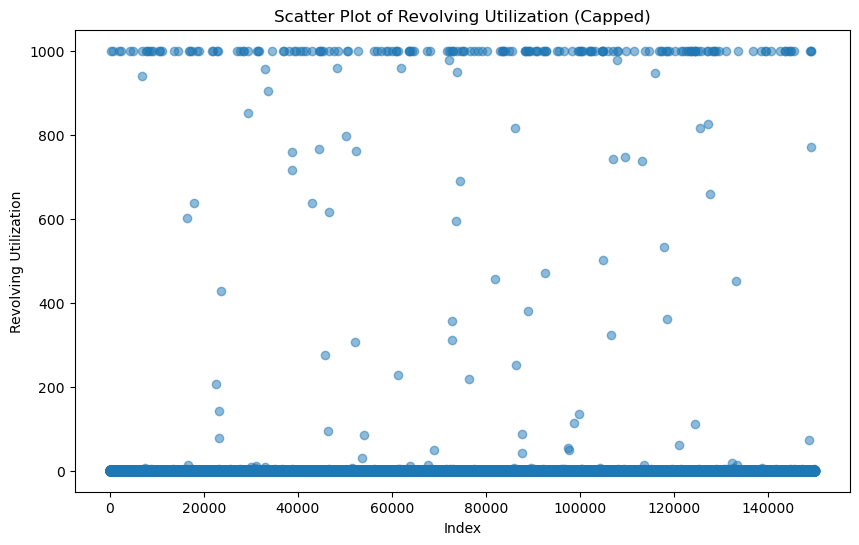

In [11]:
#we can put a threshhold on some data if we want to cap the outliers at a specific threshhold
# Set the threshold
#threshold = 1000  # Adjust this value based on your analysis or domain knowledge

# Apply the cap
#train_data['RevolvingUtilizationOfUnsecuredLines'] = train_data['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: min(x, threshold))

# Visualize the capped data
#plt.figure(figsize=(10, 6))
#plt.scatter(train_data.index, train_data['RevolvingUtilizationOfUnsecuredLines'], alpha=0.5)
#plt.title('Scatter Plot of Revolving Utilization (Capped)')
#plt.xlabel('Index')
#plt.ylabel('Revolving Utilization')
#plt.show()

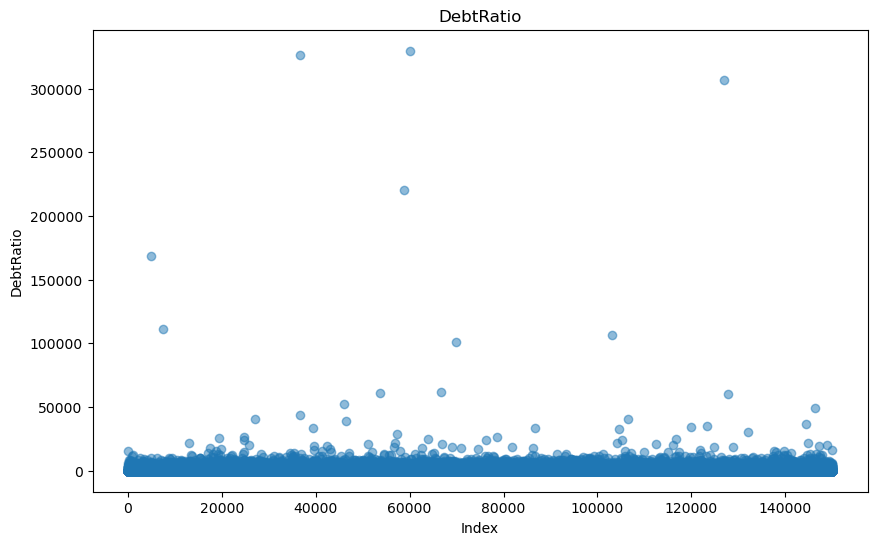

In [9]:
# Scatter Plot of DebtRatio	
plt.figure(figsize=(10, 6))
plt.scatter(train_data.index, train_data['DebtRatio'], alpha=0.5)
plt.title('DebtRatio')
plt.xlabel('Index')
plt.ylabel('DebtRatio')
plt.show()

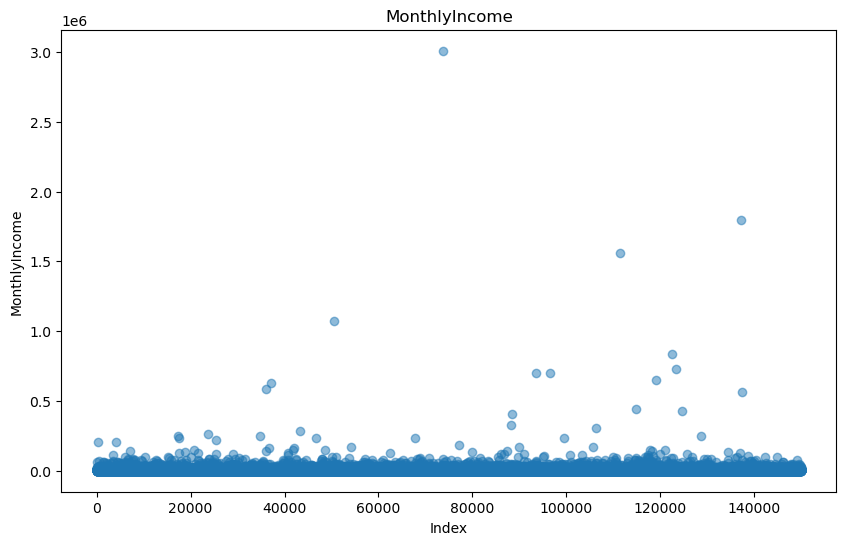

In [10]:
# Scatter Plot of monthlyincome
plt.figure(figsize=(10, 6))
plt.scatter(train_data.index, train_data['MonthlyIncome'], alpha=0.5)
plt.title('MonthlyIncome')
plt.xlabel('Index')
plt.ylabel('MonthlyIncome')
plt.show()

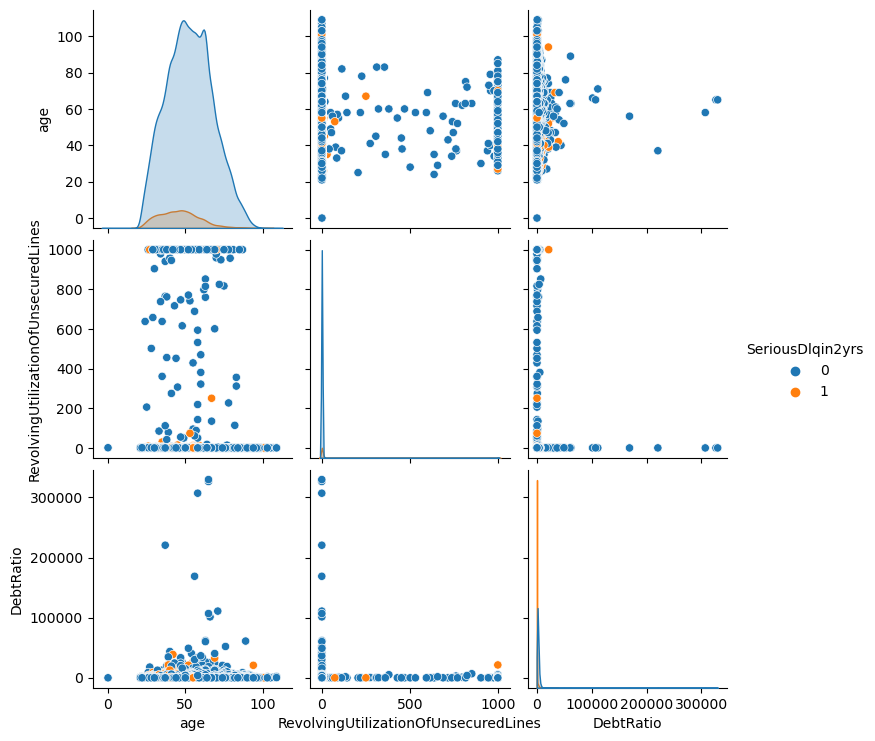

In [15]:
#Step 3: Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(train_data, vars=['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio'], hue='SeriousDlqin2yrs')
plt.show()



Note:
sns.pairplot(train_data, vars=['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio'], hue='SeriousDlqin2yrs') is using the Seaborn library to create a pair plot, which is a grid of scatter plots that shows the relationships between pairs of variables in your dataset. Let's break down each part of this line:

sns.pairplot: This is a Seaborn function used to create a pair plot.

train_data: This is the DataFrame that contains your training data.

vars=['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']: This specifies which variables (columns) from your dataset will be used for creating the pair plot. In this case, the pair plot will focus on the variables 'age', 'RevolvingUtilizationOfUnsecuredLines', and 'DebtRatio'.

hue='SeriousDlqin2yrs': The hue parameter allows you to color the data points in the pair plot based on the values of a specific variable. In this case, 'SeriousDlqin2yrs' is used as the hue variable. This means that the data points in the scatter plots will be color-coded based on whether the individual experienced serious delinquency or not.

The purpose of this pair plot is to visually explore the relationships between the selected variables while taking into account the target variable 'SeriousDlqin2yrs'. Each scatter plot in the grid will show the relationship between two variables, and the color of the data points will indicate whether the individual experienced serious delinquency or not.

wE USE Pair plots as they are useful for quickly identifying potential patterns, trends, and outliers in your data. They can help us understand how variables relate to each other and how they might influence the target variable.

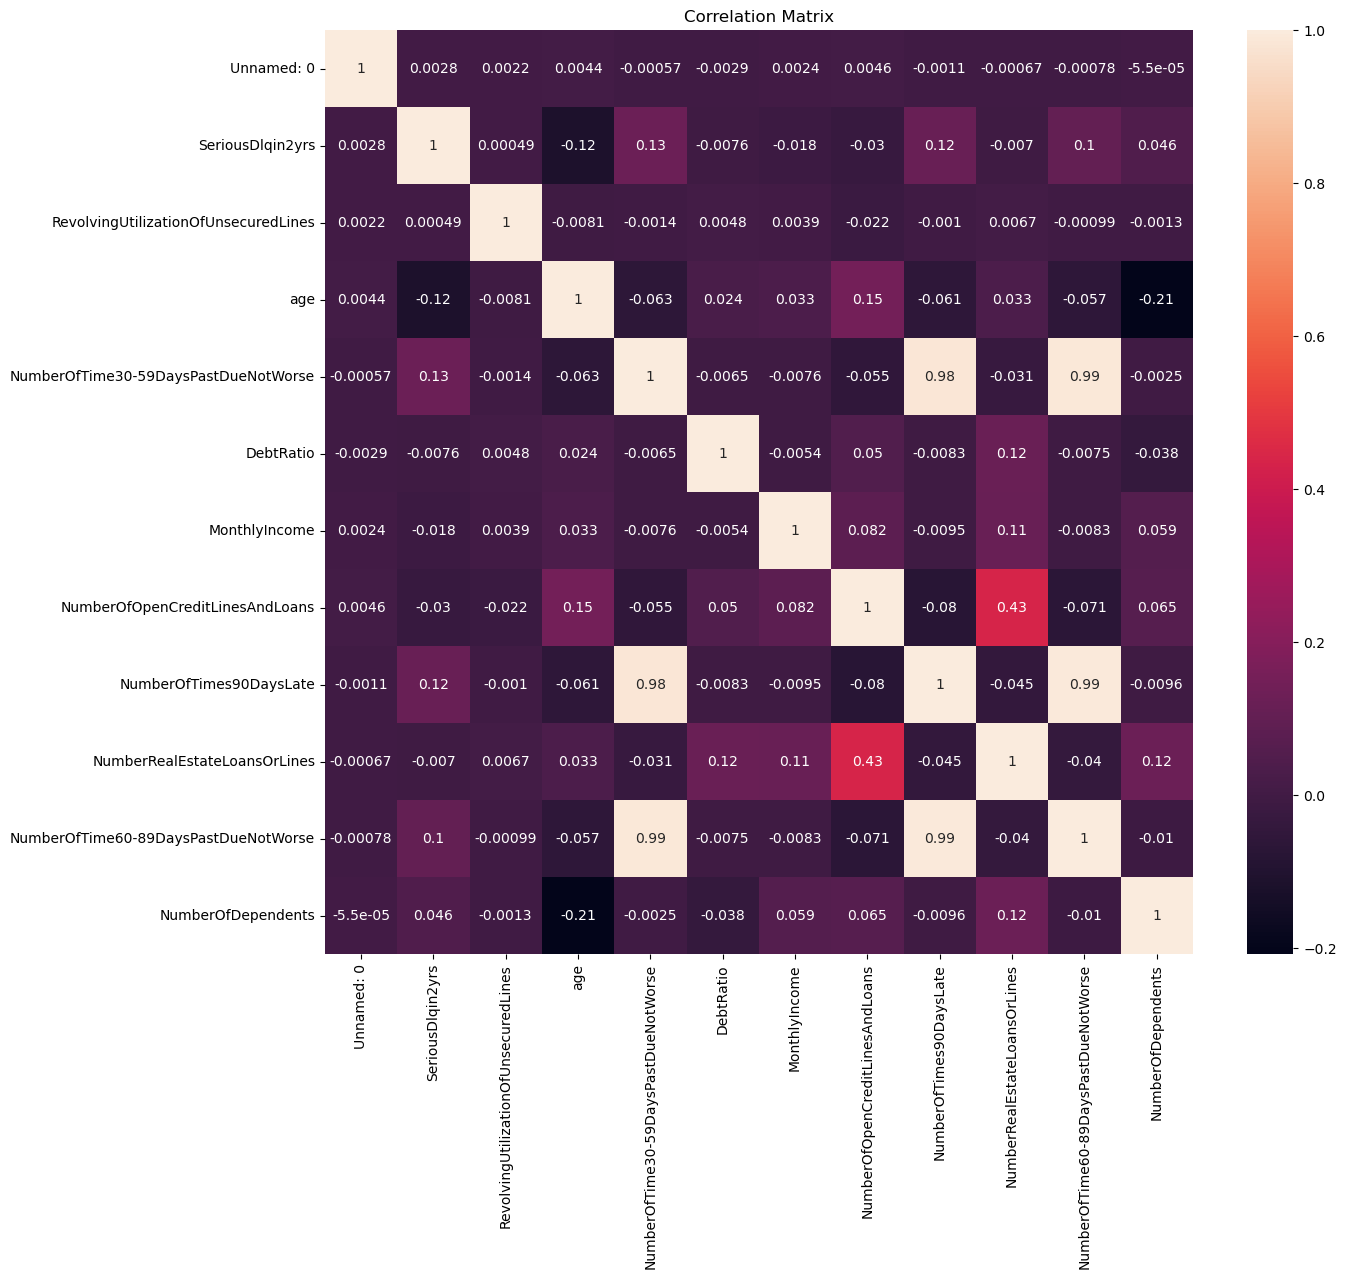

In [18]:
# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Interpreting the heatmap:

High Correlations: Dark colors or values close to 1 (positive) or -1 (negative) indicate strong correlations between the variables. This suggests that changes in one variable are associated with predictable changes in the other.
Low Correlations: Light colors or values close to 0 suggest weak or no linear relationship between the variables.
Using the heatmap, we can identify which variables are positively correlated, negatively correlated, or not significantly correlated. This information can guide feature selection, and help us understand potential relationships in your dataset.

Step 4: Feature Selection

Selecting the features we believe are most relevant for predicting credit default. We can consider features that seem to have a significant correlation with the target variable or features that intuitively make sense for credit risk assessment.

In [19]:
#selected features: age / NumberOfTime30-59DaysPastDueNotWorse	/ NumberOfTimes90DaysLate / NumberOfTime60-89DaysPastDueNotWorse

Step 5: Data Splitting

Split the training data into features (X_train) and the target variable (y_train), and consider splitting further into training and validation sets if needed.

Step 6: Model Training

Train a Linear Regression model using Scikit-Learn:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Selecting features and target variable
features = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse' ]
X_train = train_data[features]
y_train = train_data['SeriousDlqin2yrs']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# X_train: Features for training
# y_train: Target variable for training
# X_val: Features for validation
# y_val: Target variable for validation

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Why Logistic Regression is chosen for this specific task:

1. Binary Classification Problem:
The task involves predicting whether an individual will experience serious delinquency (SeriousDlqin2yrs) or not. This is a binary classification problem where the target variable has two possible outcomes: 0 (no serious delinquency) or 1 (serious delinquency). Logistic Regression is a common choice for binary classification tasks.

2. Suitable for Probability Estimation:
Logistic Regression models provide probabilities as output. In the context of credit risk assessment, it's often important to know the likelihood of an individual defaulting on a loan or experiencing serious delinquency. Logistic Regression outputs probabilities that can be interpreted as the estimated probability of a positive outcome (e.g., serious delinquency).

3. Linearity Assumption:
Logistic Regression assumes a linear relationship between the features and the log-odds of the target variable. It's suitable when the relationship between features and the log-odds is roughly linear or can be transformed to be linear.

4. Interpretable Results:
Logistic Regression coefficients can be interpreted in terms of odds ratios, which can help understand the impact of each feature on the likelihood of the positive outcome. This interpretability is valuable when you want to explain the model's predictions to stakeholders.

5. Simplicity and Speed:
Logistic Regression is relatively simple and computationally efficient. It's a good starting point for many binary classification tasks, and it often serves as a baseline model to compare against more complex algorithms.

6. Handling Linear Separability:
If the data is roughly linearly separable (even though not perfectly), Logistic Regression can still provide reasonable results. It can find a linear decision boundary that separates the two classes to a certain extent.

While Logistic Regression has its advantages, it might not capture more complex relationships in the data as effectively as some other algorithms, especially if the data is highly non-linear. It's a good idea to experiment with multiple algorithms and assess their performance using appropriate evaluation metrics before finalizing your choice of model.

Log-Odds:
The log-odds (also known as the logit) is the natural logarithm of the odds of a specific event occurring. In the context of Logistic Regression, the log-odds represents the estimated probability of the positive outcome (e.g., serious delinquency) divided by the estimated probability of the negative outcome (e.g., no serious delinquency).

The linear relationship implies that the log-odds change linearly as you change the feature values.

It's important to note that this assumption might not hold for all datasets. In cases where the relationship between the features and the log-odds is not linear, Logistic Regression might not perform well. In such situations, other machine learning algorithms that can capture non-linear relationships, such as decision trees or support vector machines, might be more suitable.

When using Logistic Regression, it's a good practice to visually inspect the relationship between each feature and the log-odds or perform further analysis to assess whether the linear assumption is reasonable for your dataset.







This is just an initial walkthrough of the project steps. 
Depending on the performance and your objectives, 
you can refine your model, explore other algorithms, 
and iterate through the steps to improve results. 
Remember, interpreting results and understanding the 
context of the predictions is crucial in a risk management scenario.

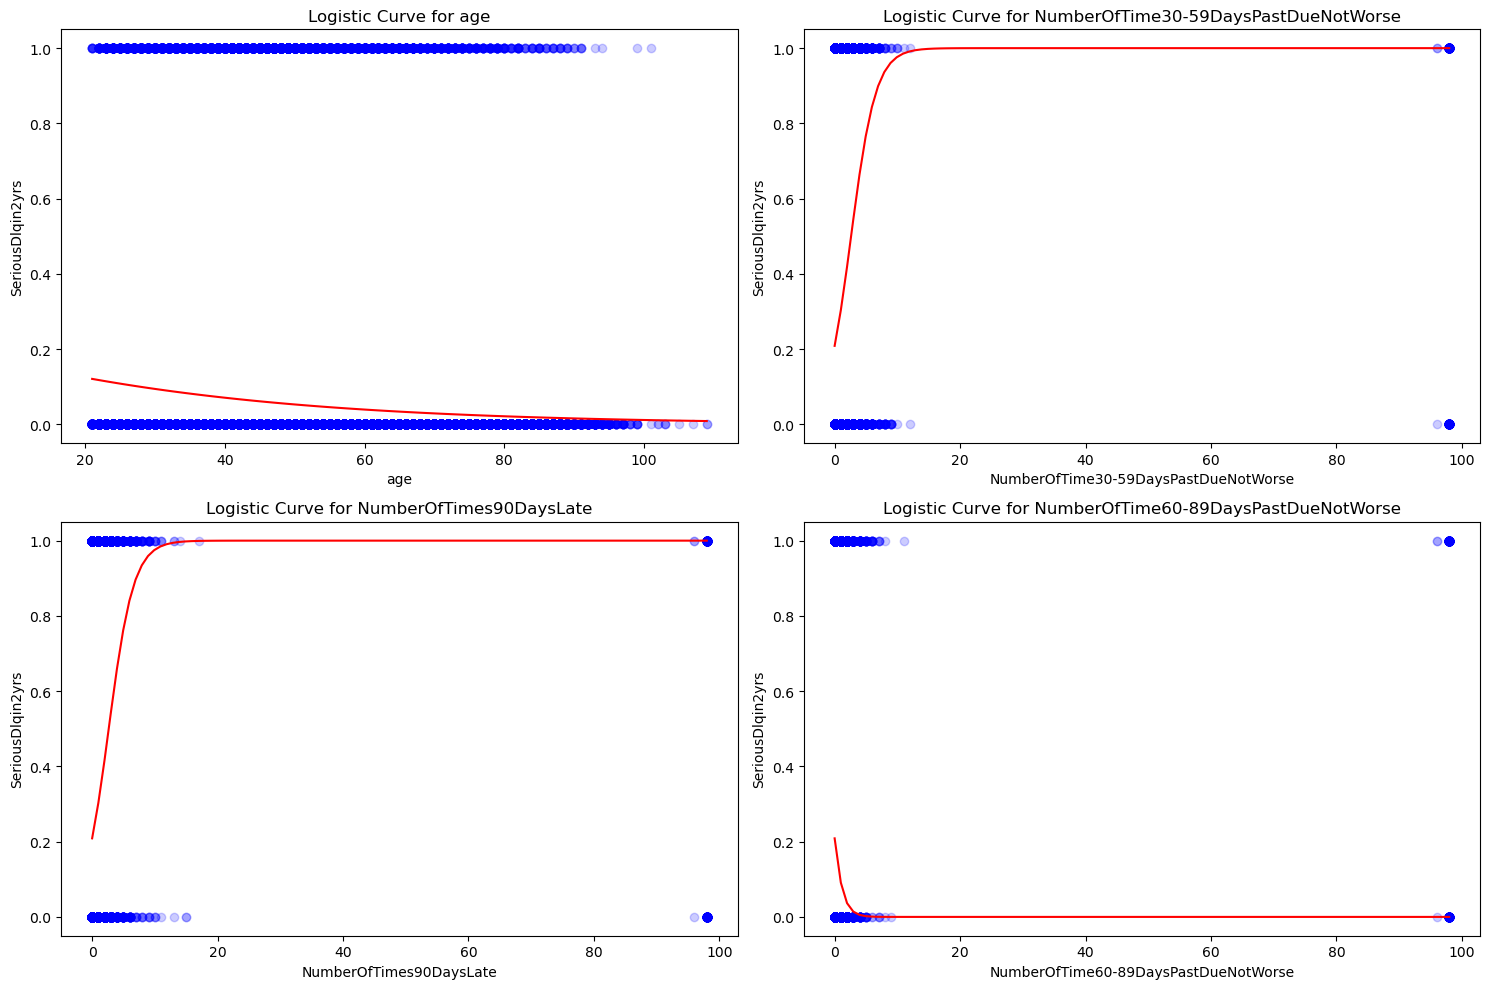

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the logistic curves for each feature
plt.figure(figsize=(15, 10))

for idx, feature in enumerate(features):
    #This loop iterates over the features list, 
    #idx is the index of the current feature, 
    
    plt.subplot(2, 2, idx+1)
    #This creates a subplot grid with 2 rows and 2 columns. 
    #The idx+1 specifies the position of the current subplot 
    #within the grid. This ensures that each feature's plot 
    #is displayed in a separate subplot.
    
    plt.scatter(X_train[feature], y_train, color='blue', alpha=0.2)
    #This plots a scatter plot of the feature values (X_train[feature]) 
    #against the target variable (y_train).
    
    plt.xlabel(feature)
    plt.ylabel('SeriousDlqin2yrs')
    plt.title(f'Logistic Curve for {feature}')
    
    X_range = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    #This creates a range of 100 evenly spaced values 
    #within the minimum and maximum values of the current feature. 
    #This range will be used to plot the logistic curve.
    
    log_odds = model.intercept_ + model.coef_[0][idx] * X_range
    #This calculates the log-odds for each value in the X_range 
    #using the model's intercept and coefficient for the current feature.
    
    odds = np.exp(log_odds)
    #calculates the odds from the log-odds
    
    prob_positive = odds / (1 + odds)
    #This calculates the estimated probability of the positive outcome 
    #(e.g., serious delinquency) from the odds.
    
    plt.plot(X_range, prob_positive, color='red')
    #This plots the logistic curve using the calculated probabilities 
    #against the feature values.
    

plt.tight_layout() #ensures that subplots are neatly arranged.
plt.show() # displays the entire figure containing all subplots

.We use np.linspace to create a range of feature values for plotting the logistic curves.
.For each feature, we calculate the corresponding log-odds using the model coefficients.
.We then calculate the odds and the probability of the positive outcome using the log-odds.
.The logistic curve is plotted, showing how the log-odds and the probability change with varying feature values.

These plots will help us to understand how the features influence the probability of the positive outcome (serious delinquency) according to the Logistic Regression model. If we observe a clear relationship between a feature and the log-odds, it suggests that the feature is informative for the model's predictions. If the curve is relatively flat, it implies the feature might not have a strong influence on the outcome.

Note: 
In the context of logistic regression and the log-odds, "odds" refers to the ratio of the probability of a certain event occurring to the probability of the event not occurring. The term "odds" is commonly used in gambling, but it's also applied in statistics to represent the likelihood of an event.

To understand this concept better:

Probability (P):

Probability measures the likelihood of an event occurring and ranges between 0 and 1.
For example, if you roll a fair six-sided die, the probability of rolling a 3 is 1/6.
Odds (O):

Odds are calculated as the ratio of the probability of the event occurring to the probability of the event not occurring.
Odds can range from 0 to positive infinity.
If the probability of an event is P, then the odds of that event occurring are P / (1 - P).
For example, if the probability of rolling a 3 on a fair six-sided die is 1/6, the odds of rolling a 3 are (1/6) / (1 - 1/6) = 1/5.
Log-Odds (Logit):

The log-odds (also known as the logit) is the natural logarithm of the odds.
The log-odds can take any real value, from negative infinity to positive infinity.
The log-odds transformation is used in logistic regression to model the relationship between predictor variables and the probability of a binary outcome.
In the context of logistic regression, we use the log-odds to represent a linear relationship between predictor variables and the natural logarithm of the odds of the positive outcome occurring. The log-odds can then be transformed back to the original odds scale using the exponential function.

So, when we hear "odds" in the term "log-odds," it's referring to the ratio of probabilities, and the log-odds transformation is applied to make this relationship linear and suitable for modeling binary outcomes with logistic regression.







Step 7: Model Evaluation

Evaluate the model's performance on the validation set:

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_val)

# Classification report and confusion matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.51      0.04      0.07      1956

    accuracy                           0.93     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.93      0.91     30000

[[27971    73]
 [ 1879    77]]
